# PDE megoldó FiPy csomaggal


A következő package-ek szükségesek:
- future
- fipy
- numpy
- matplotlib
- scipy

### Importálások

In [90]:
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as plt
import copy

A megoldandó differenciálegyenlet alakja:

$$ \frac{\partial f(r,t)}{\partial t}=D\frac{\partial^2 f(r,t)}{\partial r^2}-K\frac{\partial f(r,t)}{\partial r}+S $$

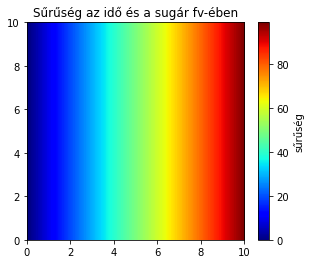

In [91]:
## Próbálkozás a 2D CellVariable-el

R = 10.  ## teljes hossz, amire lefut a program
nr = 100  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## idő bevezetése
duration = 10.
nt = 100
dt = duration / nt

## 2D mesh és CellVariable
mesh2D = Grid2D(dx=dr, dy=dt, nx=nr, ny=nt)
cellvar2D = CellVariable(mesh = mesh2D, name="sűrűség", unit="1/m**3")

for tcut in range(nt):
    cellvar2D[tcut*nr:(tcut*nr)+nr]=numerix.arange(nr)

## Ellenőrzés
contourview = Viewer(vars=cellvar2D, title="Sűrűség az idő és a sugár fv-ében")

In [92]:
## "megoldási változó" - sűrűségfv
n = CellVariable(mesh=mesh, name="sűrűség")

## diffúziós-, konvekciós- és forrásegyütthatók (D, K, S)
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## határfeltételek
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.constrain(valueLeft, mesh.facesLeft)
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

### A kezdeti feltételek megadása

A CellVariable inicializálásakor meg lehet adni az egész tartományra vonatkozó, vagy a tartomány részeire vonatkozó kezdeti feltételeket is. ld.: https://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh1D.html

Kódrészletként kikommentelve, hogy a notebook futtatásakor ne okozzon problémát:

In [93]:
## phi.value = 0.
## phi.setValue(1., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))

### Az egyenlet, annak megoldása és az eredmények ábrázolása

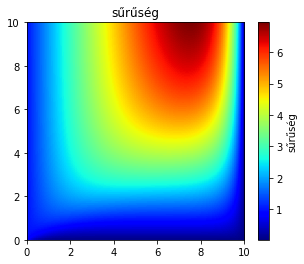

In [94]:
## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

## minden időlépésben betültök egy új adatsort a 2D CellVarible egy adott szakaszába
for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D, )

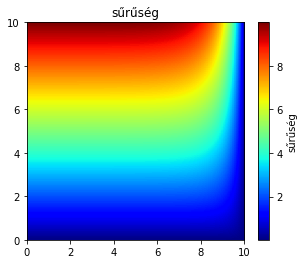

In [95]:
n = CellVariable(mesh=mesh,)
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
#n.constrain(valueLeft, mesh.facesLeft)
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

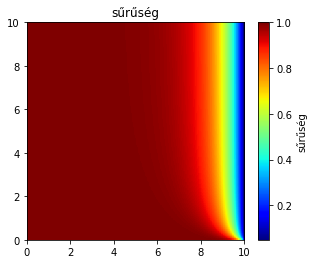

In [96]:
n = CellVariable(mesh=mesh, value=1.)
diffCoeff = 1.
convCoeff = [1.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

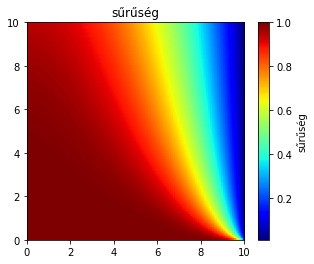

In [97]:
n = CellVariable(mesh=mesh, value=1.)
diffCoeff = 1.
convCoeff = [0.001,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
#n.constrain(valueLeft, mesh.facesLeft)
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

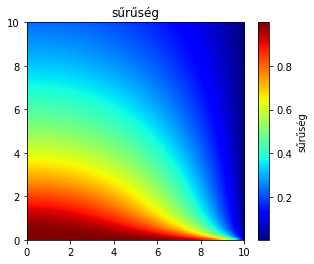

In [98]:
#nagyobb diffúzió
n = CellVariable(mesh=mesh, value=1.)
diffCoeff = 10.
convCoeff = [1.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

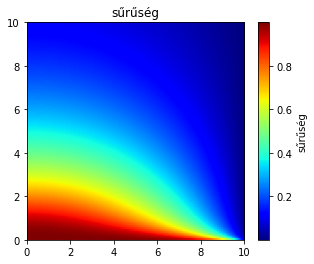

In [99]:
#kikapcsolt konvekció, kezdeti feltétel 1. mindenhol
n = CellVariable(mesh=mesh, value=1.)
diffCoeff = 10.
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

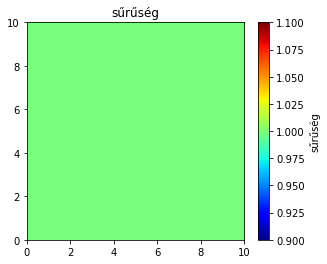

In [100]:
#kikapcsolt diffúzió
n = CellVariable(mesh=mesh, value=1.)
convCoeff = [1.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == - PowerLawConvectionTerm(coeff=convCoeff))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

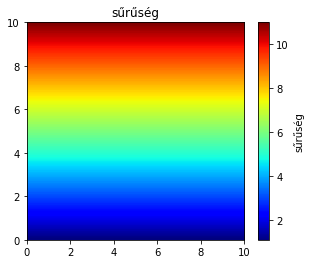

In [101]:
#kikapcsolt diffúzió forrással
n = CellVariable(mesh=mesh, value=1.)
convCoeff = [1.,]
sourceCoeff = 1.
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

eq = (TransientTerm() == - PowerLawConvectionTerm(coeff=convCoeff) + sourceCoeff)

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

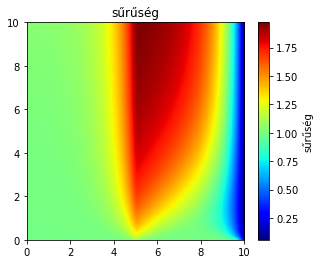

In [102]:
# diffúzió és konvekció simított Dirac delta forrással a tartomány közepén, kezdeti 1. értékkel
def delta_func(x, epsilon):
    return ((x < epsilon) & (x > -epsilon)) * \
        (1 + numerix.cos(numerix.pi * x / epsilon)) / 2 / epsilon

n = CellVariable(mesh=mesh, value=1.)
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 10.
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)
n.constrain(sourceCoeff, where=mesh.x == int(nr/2)*dr)

x0 = R / 2.

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + delta_func(mesh.x - x0, 2 * dr))

for tcut in range(nt):
    n.constrain(sourceCoeff, where=mesh.x == int(nr/2)*dr)
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

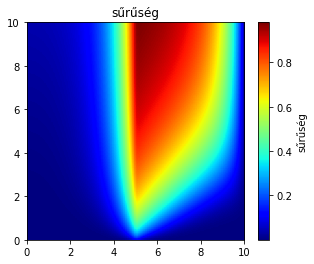

In [103]:
# diffúzió és konvekció simított Dirac delta forrással a tartomány közepén, kezdeti 0. értékkel
def delta_func(x, epsilon):
    return ((x < epsilon) & (x > -epsilon)) * \
        (1 + numerix.cos(numerix.pi * x / epsilon)) / 2 / epsilon

n = CellVariable(mesh=mesh)
diffCoeff = 1.
convCoeff = [1.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

x0 = R / 2.

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + delta_func(mesh.x - x0, 2 * dr))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

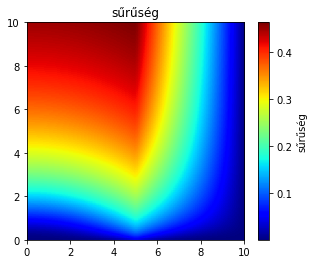

In [104]:
# diffúzió simított Dirac delta forrással a tartomány közepén, kezdeti 0. értékkel
def delta_func(x, epsilon):
    return ((x < epsilon) & (x > -epsilon)) * \
        (1 + numerix.cos(numerix.pi * x / epsilon)) / 2 / epsilon

n = CellVariable(mesh=mesh)
diffCoeff = 10.
convCoeff = [0.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

x0 = R / 2.

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + delta_func(mesh.x - x0, 2 * dr))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)

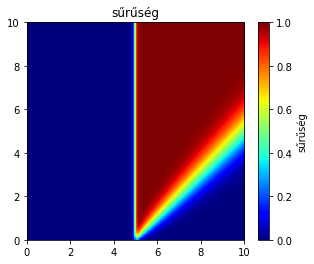

In [105]:
# konvekció simított Dirac delta forrással a tartomány közepén, kezdeti 0. értékkel
def delta_func(x, epsilon):
    return ((x < epsilon) & (x > -epsilon)) * \
        (1 + numerix.cos(numerix.pi * x / epsilon)) / 2 / epsilon

n = CellVariable(mesh=mesh)
convCoeff = [1.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

x0 = R / 2.

eq = (TransientTerm() == - PowerLawConvectionTerm(coeff=convCoeff)
      + delta_func(mesh.x - x0, 2 * dr))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)
# látható, hogy ebben a rendszerben nem tud teljesülni a jobb oldali határfeltétel

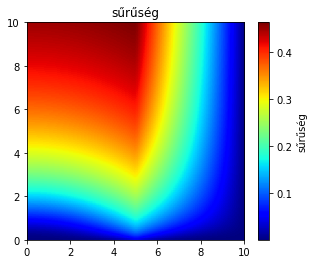

In [106]:
# diffúzió és konvekció simított Dirac delta forrással a tartomány közepén, kezdeti 0. értékkel
def delta_func(x, epsilon):
    return ((x < epsilon) & (x > -epsilon)) * \
        (1 + numerix.cos(numerix.pi * x / epsilon)) / 2 / epsilon

n = CellVariable(mesh=mesh)
diffCoeff = 10.
convCoeff = [0.,]
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.
n.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
n.constrain(valueRight, mesh.facesRight)

x0 = R / 2.

eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + delta_func(mesh.x - x0, 2 * dr))

for tcut in range(nt):
    eq.solve(var=n, dt=dt)
    cellvar2D[tcut*nr:(tcut*nr)+nr]=copy.deepcopy(n.value)
viewer = Viewer(vars=cellvar2D)